In [37]:
from data_generator import dgen,pack_by_value,downscale_nsave
from dict2obj import Dict2Obj
from fit_pca import plot_images_table

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

import time

#%load_ext autoreload
#%autoreload 2

In [5]:
path = "all_small_2409"
experiment = Dict2Obj({
    "start_time":time.mktime((2018,9,24,19,39,4,0,0,0)),
    "tick":10,
    "transition_dur":4,
})

#downscale_nsave(path,'small',factor=0.2)

In [6]:
data = list(dgen(path,experiment,start=0,limit = 200))
packed = pack_by_value(data)

Returned 98, skipped 102 files
Packed to 14 buckets, lengths: [6, 7, 7, 7, 8, 7, 8, 7, 7, 6, 7, 7, 7, 7]


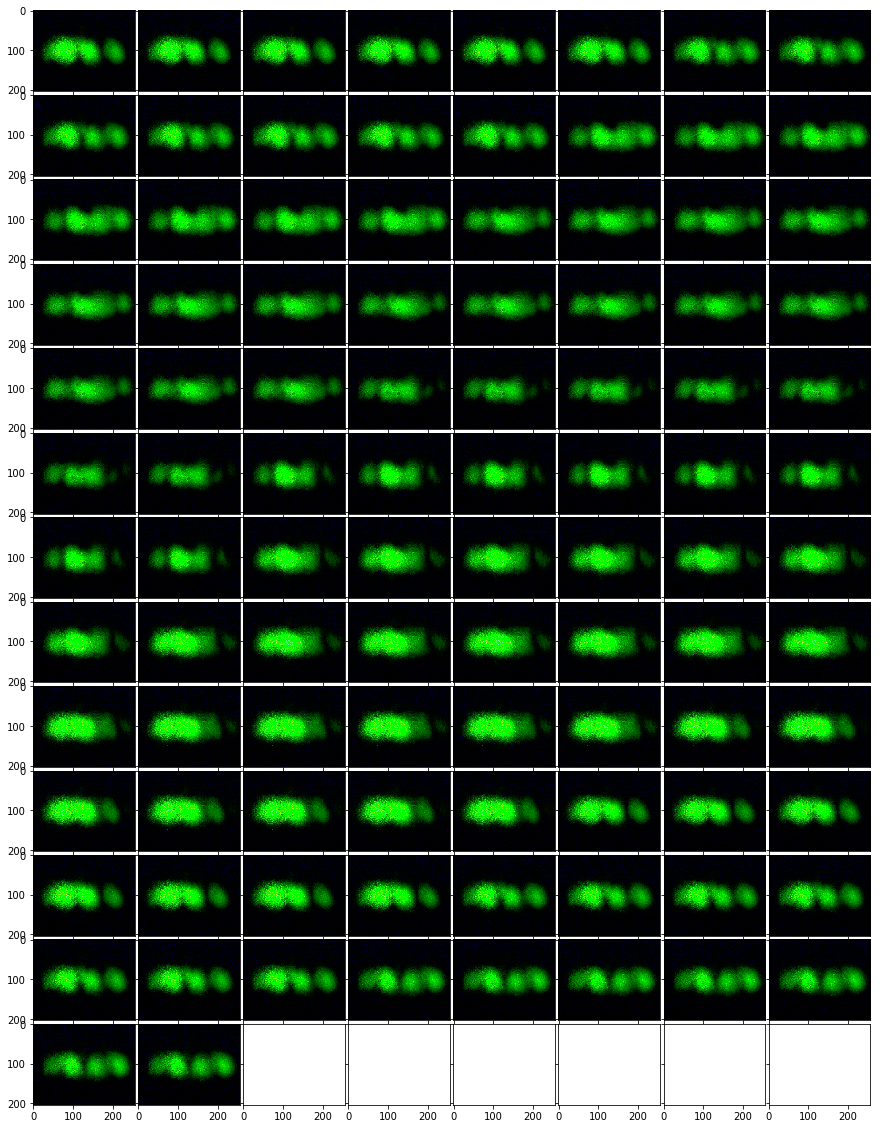

In [7]:
imgs = [d[0] for d in data]
plot_images_table(imgs,figsize=(15,35))

In [16]:
n_components = 100
pca = PCA(n_components=n_components, random_state=42)
X = [np.array(d.getdata()).flatten() for d in imgs]
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
from sklearn.externals import joblib # saving pca
_ = joblib.dump(pca, 'PCA'+str(n_components)+'.save')

In [ ]:
pca = joblib.load('PCA'+str(n_components)+'.save')

In [18]:
transformed = pca.transform(X)

In [30]:
transformed = transformed/transformed.max()


In [39]:
angles = np.array([d[1] for d in data])
angles = angels - angels.min()
angles

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,
        9.,  9.,  9.,  9.,  9., 10., 10., 10., 10., 10., 10., 10., 11.,
       11., 11., 11., 11., 11., 11., 12., 12., 12., 12., 12., 12., 12.,
       13., 13., 13., 13., 13., 13., 13.])

In [43]:
enc = OneHotEncoder()
enc.fit(angles.reshape(len(angles),1))
trAng = enc.transform(angles.reshape(len(angles),1))

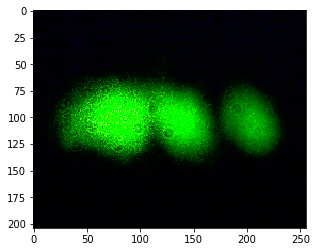

In [55]:
#X = [np.array(d.getdata()).flatten() for d in imgs]
X = np.array(X).reshape(len(X), 204, 256, 3)

import matplotlib.pyplot as plt
plt.imshow((X[0]).astype(np.uint8), interpolation='nearest')

In [173]:
test = np.cumsum([0, 6, 7, 7, 7, 8, 7, 8, 7, 7, 6, 7, 7, 7])
train = np.delete(range(len(X)), test)

array([ 1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18, 19,
       21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39,
       40, 41, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 58, 59,
       60, 61, 62, 63, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 78, 79,
       80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97])

In [209]:
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Input, Flatten, BatchNormalization
from keras.models import Model

In [217]:
#layers
first = 20
second = 10
out = 1

In [253]:
inp = Input(shape = (204, 256, 3))
x = MaxPooling2D((2, 2), padding='same')(inp)
x = Conv2D(1, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((20, 20), padding='same')(x)
x = Conv2D(1, (2, 2), activation='relu', padding='same')(x)
#x = MaxPooling2D((10, 10), padding='same')(x)
x = Flatten()(x)
x = Dense(first, activation='relu')(x)
x = Dense(second, activation='relu')(x)
x = Dense(out, activation='relu')(x)
model = Model(inp, x)
model.compile(loss='mae', optimizer='adam')

In [254]:
model.fit(X[train]/256, angles[train]%10/10, batch_size=4, epochs=300, shuffle=True, validation_data=(X[test]/256, angles[test]%10/10))

Train on 84 samples, validate on 14 samples
Epoch 1/300
84/84 [==============================] - ETA: 1:00 - loss: 0.350 - ETA: 13s - loss: 0.425 - ETA: 6s - loss: 0.3679 - ETA: 3s - loss: 0.380 - ETA: 1s - loss: 0.369 - ETA: 0s - loss: 0.359 - 4s 42ms/step - loss: 0.3655 - val_loss: 0.3643
Epoch 2/300
84/84 [==============================] - ETA: 0s - loss: 0.575 - ETA: 0s - loss: 0.375 - ETA: 0s - loss: 0.346 - ETA: 0s - loss: 0.334 - ETA: 0s - loss: 0.355 - ETA: 0s - loss: 0.358 - 0s 5ms/step - loss: 0.3655 - val_loss: 0.3643
Epoch 3/300
84/84 [==============================] - ETA: 0s - loss: 0.325 - ETA: 0s - loss: 0.310 - ETA: 0s - loss: 0.319 - ETA: 0s - loss: 0.351 - ETA: 0s - loss: 0.364 - 0s 4ms/step - loss: 0.3655 - val_loss: 0.3643
Epoch 4/300
84/84 [==============================] - ETA: 0s - loss: 0.325 - ETA: 0s - loss: 0.330 - ETA: 0s - loss: 0.359 - ETA: 0s - loss: 0.354 - ETA: 0s - loss: 0.331 - ETA: 0s - loss: 0.348 - 0s 5ms/step - loss: 0.3655 - val_loss: 0.3643
Epo

84/84 [==============================] - ETA: 0s - loss: 0.040 - ETA: 0s - loss: 0.037 - ETA: 0s - loss: 0.038 - ETA: 0s - loss: 0.036 - ETA: 0s - loss: 0.039 - ETA: 0s - loss: 0.040 - ETA: 0s - loss: 0.040 - 0s 5ms/step - loss: 0.0430 - val_loss: 0.0564
Epoch 64/300
84/84 [==============================] - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.026 - ETA: 0s - loss: 0.051 - ETA: 0s - loss: 0.041 - ETA: 0s - loss: 0.040 - ETA: 0s - loss: 0.039 - ETA: 0s - loss: 0.039 - 0s 5ms/step - loss: 0.0410 - val_loss: 0.0584
Epoch 65/300
84/84 [==============================] - ETA: 0s - loss: 0.103 - ETA: 0s - loss: 0.043 - ETA: 0s - loss: 0.049 - ETA: 0s - loss: 0.049 - ETA: 0s - loss: 0.049 - ETA: 0s - loss: 0.047 - 0s 5ms/step - loss: 0.0471 - val_loss: 0.0582
Epoch 66/300
84/84 [==============================] - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.035 - ETA: 0s - loss: 0.030 - ETA: 0s - loss: 0.046 - ETA: 0s - loss: 0.044 - ETA: 0s - loss: 0.044 - ETA: 0s - loss: 0.041 - 0s 5ms/step

Epoch 125/300
84/84 [==============================] - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.018 - ETA: 0s - loss: 0.017 - ETA: 0s - loss: 0.016 - ETA: 0s - loss: 0.023 - ETA: 0s - loss: 0.024 - ETA: 0s - loss: 0.024 - 0s 5ms/step - loss: 0.0251 - val_loss: 0.0431
Epoch 126/300
84/84 [==============================] - ETA: 0s - loss: 0.032 - ETA: 0s - loss: 0.036 - ETA: 0s - loss: 0.026 - ETA: 0s - loss: 0.025 - ETA: 0s - loss: 0.023 - ETA: 0s - loss: 0.023 - ETA: 0s - loss: 0.025 - 0s 6ms/step - loss: 0.0269 - val_loss: 0.0392
Epoch 127/300
84/84 [==============================] - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.025 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.026 - ETA: 0s - loss: 0.027 - 0s 5ms/step - loss: 0.0268 - val_loss: 0.0432
Epoch 128/300
84/84 [==============================] - ETA: 0s - loss: 0.019 - ETA: 0s - loss: 0.042 - ETA: 0s - loss: 0.036 - ETA: 0s - loss: 0.034 - ETA: 0s - loss: 0.032 - ETA: 0s - loss: 0.

84/84 [==============================] - ETA: 0s - loss: 0.017 - ETA: 0s - loss: 0.019 - ETA: 0s - loss: 0.024 - ETA: 0s - loss: 0.024 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.020 - ETA: 0s - loss: 0.021 - 0s 5ms/step - loss: 0.0224 - val_loss: 0.0401
Epoch 186/300
84/84 [==============================] - ETA: 0s - loss: 0.026 - ETA: 0s - loss: 0.018 - ETA: 0s - loss: 0.023 - ETA: 0s - loss: 0.019 - ETA: 0s - loss: 0.019 - ETA: 0s - loss: 0.019 - ETA: 0s - loss: 0.020 - 0s 5ms/step - loss: 0.0209 - val_loss: 0.0341
Epoch 187/300
84/84 [==============================] - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.025 - ETA: 0s - loss: 0.024 - ETA: 0s - loss: 0.024 - ETA: 0s - loss: 0.021 - ETA: 0s - loss: 0.022 - 0s 5ms/step - loss: 0.0220 - val_loss: 0.0309
Epoch 188/300
84/84 [==============================] - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.024 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.020 - ETA: 0s 

84/84 [==============================] - ETA: 0s - loss: 0.016 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.015 - 0s 5ms/step - loss: 0.0182 - val_loss: 0.0346
Epoch 246/300
84/84 [==============================] - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.024 - ETA: 0s - loss: 0.021 - ETA: 0s - loss: 0.021 - ETA: 0s - loss: 0.018 - ETA: 0s - loss: 0.017 - ETA: 0s - loss: 0.017 - 0s 5ms/step - loss: 0.0172 - val_loss: 0.0346
Epoch 247/300
84/84 [==============================] - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.016 - ETA: 0s - loss: 0.018 - ETA: 0s - loss: 0.023 - ETA: 0s - loss: 0.026 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.022 - 0s 5ms/step - loss: 0.0225 - val_loss: 0.0418
Epoch 248/300
84/84 [==============================] - ETA: 0s - loss: 0.021 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.017 - ETA: 0s - loss: 0.020 - ETA: 0s - loss: 0.020 - ETA: 0s - loss: 0.020 - ETA: 0s 

In [255]:
pred = model.predict(X[test]/256)*10

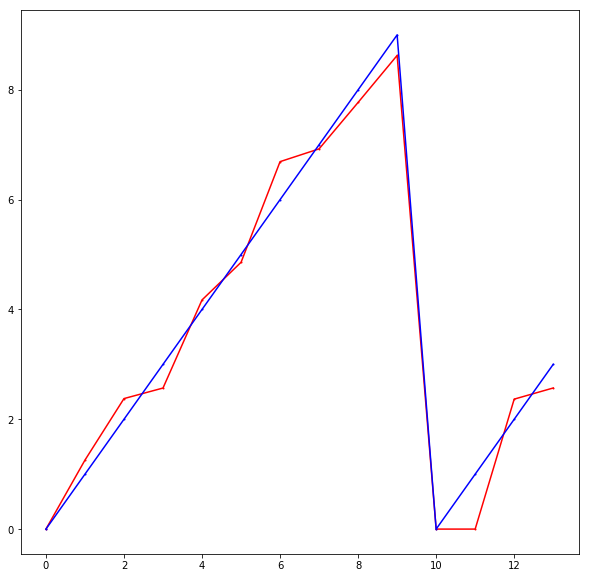

In [256]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10, 10))
plot=fig.add_subplot(111)
plot.plot(range(len(pred)), pred[:, 0], 'ro-', ms=1)
plot.plot(range(len(pred)), angles[test]%10, 'bo-', ms=1)

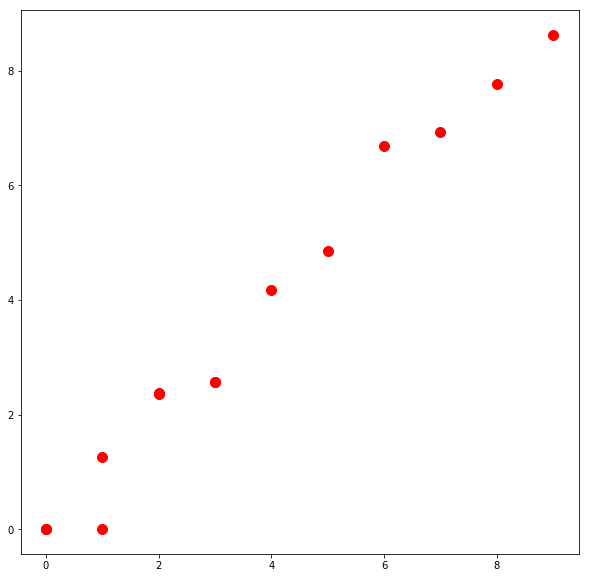

In [258]:
fig=plt.figure(figsize=(10, 10))
plot=fig.add_subplot(111)
plot.plot(angles[test]%10, pred[:, 0], 'ro', ms=10)